# NYTimes Best Sellers Data
## What trends can be found in best sellers from 2008-2016
Data pulled from http://bestsellers.barabasilab.com/


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Fiction best sellers

fic = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Sprint1_Project/nytb2008-2016/nytb2008-2016Fiction.csv')
fic.head()

,date,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2008-06-08,0553807056,0316068047,0312348673,0399154183,0385517882,0399155007,0446195979,0441015891,1416566384,...,0061160873,0307265730,0061537934,0778325504,0525950605,0061236217,0307265730,0307377040,0385515049,0345501284
1,2008-06-15,0425222195,0316068047,0553807056,0312348673,0399155007,0743290119,0399154183,0385524285,0446195979,...,006123088X,1416566384,0778325504,0061537934,0061160873,0441015891,0060829850,0307265730,0375504338,0307265730
2,2008-06-22,0385340567,0316068047,0399154973,0312348673,0425222195,0743290119,0553807056,0399155007,0399154981,...,0385524285,0446195979,006123088X,0399154183,0061537934,1400066026,0393041654,0375504338,039915504X,1416566384
3,2008-06-29,0316018708,0385340567,0316068047,0399154973,0312348673,0743290119,1416549978,0553807056,0312341814,...,0399154981,0425222195,0061537934,0061374229,0385524285,0385515049,1400066026,0385517882,1594489580,006123088X
4,2008-07-06,0312349513,0316018708,0316068047,0743290119,0312348673,0385340567,0399154973,1416549978,0061374229,...,0670018856,0553807056,0312341814,0399155007,0061537934,0425222195,0385517882,0399154981,1400066026,0446195979


In [6]:
#Nonfiction best sellers

n_fic = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Sprint1_Project/nytb2008-2016/nytb2008-2016Nonfiction.csv')
n_fic.head()

,date,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2008-06-08,0739327302,1416954120,039306235X,0061628018,0446537519,0446537519,1416562451,0767928350,0060798718,...,1592403611,0786865652,0670020745,0312372655,006078234X,0061118184,0307338770,1594201455,0805076034,0446580503
1,2008-06-15,1586485563,0739327302,1416954120,039306235X,0061628018,0670020745,0446537519,0446537519,0385520344,...,1592403611,1416562451,0767927567,159315481X,0767928350,030740515X,0061474622,0446580503,006078234X,0618683356
2,2008-06-22,0316143472,1586485563,039306235X,0739327302,1416954120,0446537519,1592403611,0061628018,1594489947,...,1416562451,0805077928,0312372655,0670020745,0385524382,030740515X,159315481X,0060798718,0446580503,0307395634
3,2008-06-29,0316143472,1586485563,1592403611,0446581194,039306235X,0446537519,1416954120,0739327302,1594489947,...,087113988X,0375424040,0446537519,0446580503,0767928350,0805077928,159315481X,0312372655,0061628018,0307383296
4,2008-07-06,0316143472,1586485563,0446581194,1416954120,1401359652,0739327302,039306235X,1400064805,1594489947,...,1592403611,159315481X,0446537519,030740515X,0061628018,0446580503,1416950737,0061234001,0618683356,0307383296


In [7]:
#Metadata on books

info = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Sprint1_Project/nytb2008-2016/isbnToInfo.csv')
info.head()

,isbn,Author,Category,Author_NY,Title_NY,author_gender
0,0316037915,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Michael Ledwidge,TICK TOCK,multi
1,0446572993,BALDACCI DAVID,Suspense/Thrillers,David Baldacci,THE INNOCENT,male
2,0385341679,MONING KAREN MARIE,Romance,Karen Marie Moning,SHADOWFEVER,female
3,0061374229,WROBLEWSKI DAVID,Fiction General,David Wroblewski,THE STORY OF EDGAR SAWTELLE,male
4,0547386079,LEHRER JONAH,Reference,Jonah Lehrer,IMAGINE,male


In [8]:
new_fic = fic.filter(['date','1'], axis=1) # Breaking DF down to only #1 best seller
new_fic.head()

,date,1
0,2008-06-08,0553807056
1,2008-06-15,0425222195
2,2008-06-22,0385340567
3,2008-06-29,0316018708
4,2008-07-06,0312349513


In [9]:
new_fic.rename(columns={'1':'isbn'},inplace=True)
new_fic.head()

,date,isbn
0,2008-06-08,0553807056
1,2008-06-15,0425222195
2,2008-06-22,0385340567
3,2008-06-29,0316018708
4,2008-07-06,0312349513


In [22]:
f1_books = pd.merge(new_fic, info, how='left', on='isbn') #Join to get meta data on books
f1_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender
0,2008-06-08,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male
1,2008-06-15,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female
2,2008-06-22,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male
3,2008-06-29,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi
4,2008-07-06,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female


In [330]:
f1_books['number'] = '1' # Adding column to show these are the #1 books
f1_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,1
1,2008-06-15,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female,1
2,2008-06-22,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,1
3,2008-06-29,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi,1
4,2008-07-06,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female,1


In [331]:
fic_2 = fic.filter(['date','2'], axis=1)
f2_books = pd.merge(fic_2, info, how='left', left_on='2', right_on='isbn') #Join to get meta data on books
f2_books['number'] = '2' # Adding column to show these are the #2 books
f2_books.drop(columns='2',axis=1, inplace=True)
f2_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,2
1,2008-06-15,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,2
2,2008-06-22,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,2
3,2008-06-29,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,2
4,2008-07-06,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi,2


In [332]:
fic_3 = fic.filter(['date','3'], axis=1)
f3_books = pd.merge(fic_3, info, how='left', left_on='3', right_on='isbn') #Join to get meta data on books
f3_books['number'] = '3' # Adding column to show these are the #3 books
f3_books.drop(columns='3',axis=1, inplace=True)
f3_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,3
1,2008-06-15,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,3
2,2008-06-22,0399154973,CUSSLER CLIVE,Action/Adventure,Clive Cussler with Jack Du Brul,PLAGUE SHIP,multi,3
3,2008-06-29,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,3
4,2008-07-06,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,3


In [333]:
fic_4 = fic.filter(['date','4'], axis=1)
f4_books = pd.merge(fic_4, info, how='left', left_on='4', right_on='isbn') #Join to get meta data on books
f4_books['number'] = '4' # Adding column to show these are the #4 books
f4_books.drop(columns='4',axis=1, inplace=True)
f4_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0399154183,CORNWELL PATRICIA,Mystery/Detective,Patricia Cornwell,THE FRONT,female,4
1,2008-06-15,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,4
2,2008-06-22,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,4
3,2008-06-29,0399154973,CUSSLER CLIVE,Action/Adventure,Clive Cussler with Jack Du Brul,PLAGUE SHIP,multi,4
4,2008-07-06,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,4


In [334]:
fic_5 = fic.filter(['date','5'], axis=1)
f5_books = pd.merge(fic_5, info, how='left', left_on='5', right_on='isbn') #Join to get meta data on books
f5_books['number'] = '5' # Adding column to show these are the #5 books
f5_books.drop(columns='5',axis=1, inplace=True)
f5_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0385517882,PALAHNIUK CHUCK,Fiction General,Chuck Palahniuk,SNUFF,male,5
1,2008-06-15,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,5
2,2008-06-22,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female,5
3,2008-06-29,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,5
4,2008-07-06,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,5


In [335]:
fic_6 = fic.filter(['date','6'], axis=1)
f6_books = pd.merge(fic_6, info, how='left', left_on='6', right_on='isbn') #Join to get meta data on books
f6_books['number'] = '6' # Adding column to show these are the #6 books
f6_books.drop(columns='6',axis=1, inplace=True)
f6_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,6
1,2008-06-15,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,6
2,2008-06-22,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,6
3,2008-06-29,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,6
4,2008-07-06,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,6


In [336]:
fic_7 = fic.filter(['date','7'], axis=1)
f7_books = pd.merge(fic_7, info, how='left', left_on='7', right_on='isbn') #Join to get meta data on books
f7_books['number'] = '7' # Adding column to show these are the #7 books
f7_books.drop(columns='7',axis=1, inplace=True)
f7_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0446195979,BALDACCI DAVID,Suspense/Thrillers,John Sandford,PHANTOM PREY,male,7
1,2008-06-15,0399154183,CORNWELL PATRICIA,Mystery/Detective,Patricia Cornwell,THE FRONT,female,7
2,2008-06-22,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,7
3,2008-06-29,1416549978,DEAVER JEFFERY,Mystery/Detective,Jeffery Deaver,THE BROKEN WINDOW,male,7
4,2008-07-06,0399154973,CUSSLER CLIVE,Action/Adventure,Clive Cussler with Jack Du Brul,PLAGUE SHIP,multi,7


In [337]:
fic_8 = fic.filter(['date','8'], axis=1)
f8_books = pd.merge(fic_8, info, how='left', left_on='8', right_on='isbn') #Join to get meta data on books
f8_books['number'] = '8' # Adding column to show these are the #8 books
f8_books.drop(columns='8',axis=1, inplace=True)
f8_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0441015891,HARRIS CHARLAINE,Fantasy,Charlaine Harris,FROM DEAD TO WORSE,female,8
1,2008-06-15,0385524285,FAULKS SEBASTIAN,Action/Adventure,Sebastian Faulks,DEVIL MAY CARE,multi,8
2,2008-06-22,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,8
3,2008-06-29,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,8
4,2008-07-06,1416549978,DEAVER JEFFERY,Mystery/Detective,Jeffery Deaver,THE BROKEN WINDOW,male,8


In [338]:
fic_9 = fic.filter(['date','9'], axis=1)
f9_books = pd.merge(fic_9, info, how='left', left_on='9', right_on='isbn') #Join to get meta data on books
f9_books['number'] = '9' # Adding column to show these are the #9 books
f9_books.drop(columns='9',axis=1, inplace=True)
f9_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,1416566384,CLARK MARY HIGGINS,Suspense/Thrillers,Elizabeth George,CARELESS IN RED,female,9
1,2008-06-15,0446195979,BALDACCI DAVID,Suspense/Thrillers,John Sandford,PHANTOM PREY,male,9
2,2008-06-22,0399154981,GRIFFIN W. E. B.,Mystery/Detective,W E B Griffin and William E Butterworth IV,DEATH AND HONOR,multi,9
3,2008-06-29,0312341814,COLLINS JACKIE,Romance,Jackie Collins,MARRIED LOVERS,female,9
4,2008-07-06,0061374229,WROBLEWSKI DAVID,Fiction General,David Wroblewski,THE STORY OF EDGAR SAWTELLE,male,9


In [323]:
fic_10 = fic.filter(['date','10'], axis=1)
f10_books = pd.merge(fic_10, info, how='left', left_on='10', right_on='isbn') #Join to get meta data on books
f10_books['number'] = '10' # Adding column to show these are the #10 books
f10_books.drop(columns='10',axis=1, inplace=True)
f10_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0778325504,MACOMBER DEBBIE,Romance,David Baldacci,THE WHOLE TRUTH,female,10
1,2008-06-15,0385517882,PALAHNIUK CHUCK,Fiction General,Chuck Palahniuk,SNUFF,male,10
2,2008-06-22,0385517882,PALAHNIUK CHUCK,Fiction General,Chuck Palahniuk,SNUFF,male,10
3,2008-06-29,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,10
4,2008-07-06,1416537325,LINDSEY JOHANNA,Romance,Johanna Lindsey,NO CHOICE BUT SEDUCTION,female,10


In [339]:
fiction = pd.merge(f1_books, f2_books, how='outer')
fiction = pd.merge(fiction, f3_books, how='outer')
fiction = pd.merge(fiction, f4_books, how='outer')
fiction = pd.merge(fiction, f5_books, how='outer')
fiction = pd.merge(fiction, f6_books, how='outer')
fiction = pd.merge(fiction, f7_books, how='outer')
fiction = pd.merge(fiction, f8_books, how='outer')
fiction = pd.merge(fiction, f9_books, how='outer')
fiction = pd.merge(fiction, f10_books, how='outer')

In [340]:
fiction.describe(include='all')

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
count,4100,4100,4100,4100,4100,4093,4086,4100
unique,410,1193,353,11,396,1181,4,10
top,2015-07-19,1476746583,PATTERSON JAMES,Suspense/Thrillers,John Grisham,ALL THE LIGHT WE CANNOT SEE,male,2
freq,10,89,292,1406,135,89,1803,410


In [341]:
fiction['date'] = fiction['date'].astype('datetime64[D]')
#fiction['date'] = pd.to_datetime(fiction['date'], format = "%Y-%M-%D")
fiction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4100 entries, 0 to 4099
Data columns (total 8 columns):
date             4100 non-null datetime64[ns]
isbn             4100 non-null object
Author           4100 non-null object
Category         4100 non-null object
Author_NY        4100 non-null object
Title_NY         4093 non-null object
author_gender    4086 non-null object
number           4100 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 288.3+ KB


In [358]:
fiction['yearMonth'] = fiction.date.dt.to_period('M') #Add column with just year & month for grouping
fiction.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth
0,2008-06-08,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,1,2008-06
1,2008-06-15,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female,1,2008-06
2,2008-06-22,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,1,2008-06
3,2008-06-29,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi,1,2008-06
4,2008-07-06,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female,1,2008-07


In [359]:
fiction.describe(include='all')

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth
count,4100,4100,4100,4100,4100,4093,4100,4100,4100
unique,410,1193,353,11,396,1181,3,10,95
top,2012-06-17 00:00:00,1476746583,PATTERSON JAMES,Suspense/Thrillers,John Grisham,ALL THE LIGHT WE CANNOT SEE,male,2,2009-05
freq,10,89,292,1406,135,89,1804,410,50
first,2008-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-04-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
fiction.isna().sum()

date             0
isbn             0
Author           0
Category         0
Author_NY        0
Title_NY         7
author_gender    0
number           0
yearMonth        0
dtype: int64

In [345]:
fiction[fiction.isnull().any(axis=1)] #show all rows with NaN in any column

# All of these are James Patterson and Maxine Paetro and should be multi

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth
110,2010-07-18,0316096156,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,PRIVATE:,NaN,1,201007
189,2012-01-22,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,NaN,1,201201
191,2012-02-05,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,NaN,1,201202
600,2012-01-29,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,NaN,2,201201
602,2012-02-12,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,NaN,2,201202
603,2012-02-19,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,NaN,2,201202
931,2010-07-25,0316096156,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,PRIVATE:,NaN,3,201007
1424,2012-02-26,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,NaN,4,201202
1752,2010-08-01,0316096156,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,PRIVATE:,NaN,5,201008
1753,2010-08-08,0316096156,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,PRIVATE:,NaN,5,201008


In [346]:
# Updating NaN genders to show multi

fiction[['author_gender']] = fiction[['author_gender']].fillna(value='multi')
fiction[fiction.isnull().any(axis=1)]

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth
189,2012-01-22,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,multi,1,201201
191,2012-02-05,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,multi,1,201202
600,2012-01-29,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,multi,2,201201
602,2012-02-12,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,multi,2,201202
603,2012-02-19,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,multi,2,201202
1424,2012-02-26,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,multi,4,201202
3065,2012-03-04,0316097403,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Maxine Paetro,NaN,multi,8,201203


In [347]:
fiction.isna().sum() #no more Nans

date             0
isbn             0
Author           0
Category         0
Author_NY        0
Title_NY         7
author_gender    0
number           0
yearMonth        0
dtype: int64

In [348]:
fiction['author_gender'].unique()

array(['male', 'female', 'multi', 'unknown'], dtype=object)

In [349]:
#Updating unknown genders to the correct gender found on GoodReads

fiction.loc[(fiction['Author_NY'].isin(['J D Robb','J R Ward','Danielle Steel',
                               'Jhumpa Lahiri','M L Stedman','J Courtney Sullivan',
                               'Téa Obreht','Kresley Cole','JR Ward'])) & 
            (fiction['author_gender'] == 'unknown'), 'author_gender'] = 'female'
fiction.loc[(fiction['Author_NY'].isin(['David Weber'])) & 
            (fiction['author_gender'] == 'unknown'), 'author_gender'] = 'male'

In [350]:
fiction[fiction.author_gender == 'unknown'] #No more unknowns

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,yearMonth


In [351]:
fiction.Category.unique().tolist()

['Suspense/Thrillers',
 'Fantasy',
 'Mystery/Detective',
 'Romance',
 'Science Fiction',
 'Fiction General',
 'Action/Adventure',
 'Horror/Occult/Psychological',
 'Religious Fiction',
 'Poetry',
 'Western']

In [417]:
category = pd.crosstab(fiction['date'], fiction['Category'],normalize='index')
print(category)

Category    Action/Adventure  Fantasy  Fiction General  \
date                                                     
2008-06-08               0.0      0.1              0.2   
2008-06-15               0.1      0.1              0.3   
2008-06-22               0.1      0.1              0.3   
2008-06-29               0.1      0.0              0.2   
2008-07-06               0.1      0.0              0.3   
2008-07-13               0.0      0.0              0.4   
2008-07-20               0.0      0.0              0.2   
2008-07-27               0.0      0.0              0.3   
2008-08-03               0.0      0.0              0.3   
2008-08-10               0.0      0.0              0.2   
2008-08-17               0.0      0.0              0.3   
2008-08-24               0.0      0.0              0.2   
2008-08-31               0.0      0.0              0.3   
2008-09-07               0.0      0.0              0.3   
2008-09-14               0.0      0.1              0.2   
2008-09-21    

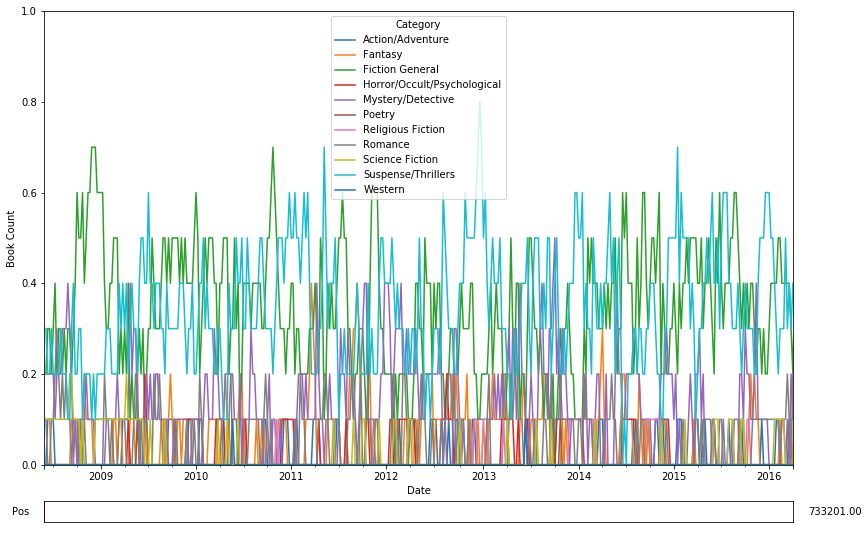

''

In [421]:
from matplotlib.widgets import Slider
import matplotlib 

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
l = category.plot(figsize=(16,10), ax=ax)

plt.ylabel('Book Count')
plt.xlabel('Date')
plt.axis(['2008-06','2016-04',0,1])

x_min_index = 0
x_max_index = 409

x_min = category.index[x_min_index]
x_max = category.index[x_max_index]

axcolor = 'lightgoldenrodyellow'
axpos = plt.axes([0.25, 0.17, 0.65, 0.03])

slider_max = len(category.index) - x_max_index - 1

# Slider(axes, name, min, max)
spos = Slider(axpos, 'Pos', matplotlib.dates.date2num(x_min), matplotlib.dates.date2num(x_max))

# pretty date names
plt.gcf().autofmt_xdate()

def update(val):
    pos = spos.val
    xmin_time = matplotlib.dates.num2date(pos)
    xmax_time = matplotlib.dates.num2date(pos) + x_dt
    
    xmin_time = pos
    print(xmin_time)
    ax.axis([xmin_time, xmax_time, y_min, y_max])

spos.on_changed(update)

plt.show()
;

In [419]:
print(x_max)

2010-03-28 00:00:00


In [286]:
gender = pd.crosstab(fiction['yearMonth'], fiction['author_gender'],normalize='index')
print(gender)

author_gender  female   male  multi
yearMonth                          
2008-10         0.300  0.575  0.125
2008-11         0.280  0.660  0.060
2008-12         0.200  0.700  0.100
2008-6          0.475  0.400  0.125
2008-7          0.600  0.275  0.125
2008-8          0.480  0.340  0.180
2008-9          0.400  0.400  0.200
2009-1          0.325  0.600  0.075
2009-10         0.500  0.425  0.075
2009-11         0.420  0.520  0.060
2009-12         0.225  0.700  0.075
2009-2          0.400  0.475  0.125
2009-3          0.500  0.300  0.200
2009-4          0.525  0.300  0.175
2009-5          0.460  0.420  0.120
2009-6          0.350  0.425  0.225
2009-7          0.500  0.250  0.250
2009-8          0.520  0.300  0.180
2009-9          0.575  0.250  0.175
2010-1          0.340  0.660  0.000
2010-10         0.260  0.480  0.260
2010-11         0.150  0.625  0.225
2010-12         0.100  0.600  0.300
2010-2          0.450  0.450  0.100
2010-3          0.575  0.250  0.175
2010-4          0.475  0.425

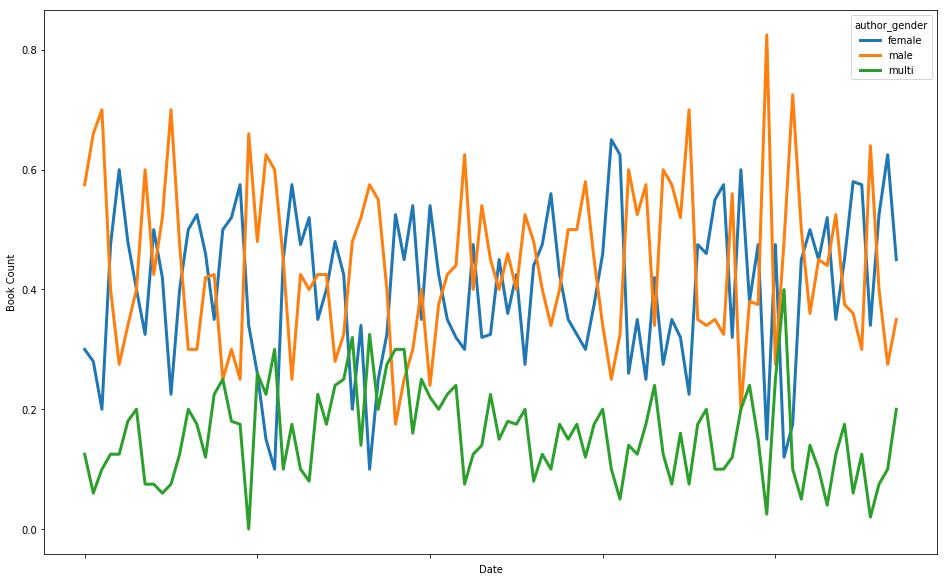

In [287]:
fig, ax = plt.subplots()
gender.plot(figsize=(16,10), ax=ax,linewidth=3)
#plt.text(1996.75,1.15,s="Who Got To Be On 'The Daily Show'?",fontsize=20,
#         weight='bold')
plt.ylabel('Book Count')
plt.xlabel('Date');